In [1]:
import pandas as pd 

In [2]:
#공통으로 설정할것 

from IPython.display import display
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import mglearn

from sklearn.model_selection import train_test_split
# train , test data 나눠줄때 사용하는 것 

import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
# 위에것은 교과서에 없는 내용인데, 숫자 마이너스 부호 깨질때 쓰는거임 

import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/malgunbd.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)
# 폰트 계속 깨져서 폰트 설정 
# 이건 책에 없는거임 

In [3]:
df1 = pd.read_excel(r"C:\Users\shipo\Data\KMOU project\해양 데이터\3. 진짜 최종\최종본.xlsx",encoding="utf-8")

In [4]:
df1.info()
# null 값이 없음을 확인할 수 있다 => 기존 null값 다 제거 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11972 entries, 0 to 11971
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   날짜           11972 non-null  datetime64[ns]
 1   지역           11972 non-null  object        
 2   발생해역         11972 non-null  object        
 3   선종           11972 non-null  object        
 4   톤수           11972 non-null  float64       
 5   계절           11972 non-null  object        
 6   월            11972 non-null  int64         
 7   시간대          11972 non-null  int64         
 8   시간대_구체       11972 non-null  object        
 9   기상상태         11972 non-null  object        
 10  지점           11972 non-null  int64         
 11  풍속(m/s)      11972 non-null  float64       
 12  풍향(deg)      11972 non-null  int64         
 13  GUST풍속(m/s)  11972 non-null  float64       
 14  현지기압(hPa)    11972 non-null  float64       
 15  습도(%)        11972 non-null  int64         
 16  기온(°

In [5]:
df1.shape
# 11972 건의 레코드와 25개의 칼럼을 갖고 있음

(11972, 25)

In [6]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
sns.set() # setting seaborn defaulf for plots 

In [7]:
# pie chart 만들기 

def pie_chart(feature):
    feature_ratio = df1[feature].value_counts(sort=False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    no_accident = df1[df1['y'] == 0][feature].value_counts()
    accident = df1[df1['y'] == 1][feature].value_counts()
    
    plt.plot(aspect='auto')
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
    plt.title(feature + "'s ratio in total")
    plt.show()
    
    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, i+1, aspect='equal')
        plt.pie([no_accident[index], accident[index]], labels=['no_accident','accident'], autopct='%1.1f%%')
        plt.title(str(index) + "'s ratio")
    
    plt.show()
        

C:\Users\shipo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shipo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shipo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shipo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shipo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shipo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50872 missing from c

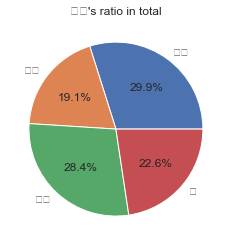

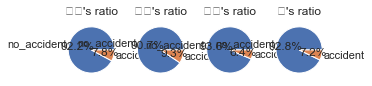

In [8]:
pie_chart('계절')

In [9]:
A = df1.corr()['y'].sort_values(ascending=False)
A.to_frame()
# 쓸데없는 것이 많이 보이므로 몇몇개를 지운다

,y
y,1.000000
인원,0.217095
지점,0.040753
현지기압(hPa),0.034641
톤수,0.025630
GUST풍속(m/s),0.013753
풍속(m/s),0.012129
풍향(deg),0.005157
월,-0.007324
최대파고(m),-0.011407


In [10]:
# df2 = [df1]
df1.columns

Index(['날짜', '지역', '발생해역', '선종', '톤수', '계절', '월', '시간대', '시간대_구체', '기상상태',
       '지점', '풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)',
       '기온(°C)', '수온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)',
       '파향(deg)', '인원', 'y'],
      dtype='object')

In [11]:
drop = ['날짜','월','시간대','기상상태','지점','인원','발생해역']
df3 = df1.drop(drop, axis=1)
df3.head()

,지역,선종,톤수,계절,시간대_구체,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg),y
0,목포,화물선,3850.00,겨울,20-24시,4.4,146,5.9,1020.8,68,10.2,11.4,0.1,0.1,0.0,4.9,89.0,0
1,목포,예부선,4003.00,겨울,0-4시,2.7,19,4.4,1022.5,57,7.6,11.3,0.1,0.1,0.1,2.1,270.0,0
2,목포,예부선,2909.00,가을,20-24시,2.7,305,4.1,1022.6,56,8.8,11.8,0.5,0.2,0.1,2.7,90.0,1
3,목포,어선,9.77,가을,12-16시,8.5,161,12.5,1013.6,63,14.2,13.2,0.5,0.2,0.2,2.1,90.0,0
4,목포,여객선,75.00,가을,8-12시,4.8,28,8.2,1027.8,58,9.1,12.5,0.4,0.3,0.2,2.8,90.0,0


In [12]:
A = df3.corr()['y'].sort_values(ascending=False)
A = A.to_frame()

In [13]:
A.to_csv(r"C:\Users\shipo\Data\KMOU project\해양 데이터\3. 진짜 최종\시각화자료\상관계수1.csv", encoding="euc-kr")

In [14]:
df3 = pd.get_dummies(df3)
df3.head()

,톤수,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),...,계절_가을,계절_겨울,계절_봄,계절_여름,시간대_구체_0-4시,시간대_구체_12-16시,시간대_구체_16-20시,시간대_구체_20-24시,시간대_구체_4-8시,시간대_구체_8-12시
0,3850.00,4.4,146,5.9,1020.8,68,10.2,11.4,0.1,0.1,...,0,1,0,0,0,0,0,1,0,0
1,4003.00,2.7,19,4.4,1022.5,57,7.6,11.3,0.1,0.1,...,0,1,0,0,1,0,0,0,0,0
2,2909.00,2.7,305,4.1,1022.6,56,8.8,11.8,0.5,0.2,...,1,0,0,0,0,0,0,1,0,0
3,9.77,8.5,161,12.5,1013.6,63,14.2,13.2,0.5,0.2,...,1,0,0,0,0,1,0,0,0,0
4,75.00,4.8,28,8.2,1027.8,58,9.1,12.5,0.4,0.3,...,1,0,0,0,0,0,0,0,0,1


In [15]:
# 데이터 나누기 
y = df3[['y']]
X = df3.drop('y',axis=1)

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2020)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# 각각 같은 것을 확인

(8979, 57)
(8979, 1)
(2993, 57)
(2993, 1)


In [17]:
X_train.columns

Index(['톤수', '풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)',
       '기온(°C)', '수온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)',
       '파향(deg)', '지역_군산', '지역_동해', '지역_목포', '지역_보령', '지역_본청', '지역_부산',
       '지역_부안', '지역_서귀포', '지역_속초', '지역_여수', '지역_완도', '지역_울산', '지역_인천', '지역_제주',
       '지역_창원', '지역_태안', '지역_통영', '지역_평택', '지역_포항', '선종_고무보트', '선종_관공선',
       '선종_기타', '선종_기타(레져선박)', '선종_낚시어선', '선종_모터보트', '선종_수상오토바이', '선종_어선',
       '선종_여객선', '선종_예부선', '선종_요트', '선종_유도선', '선종_유조선', '선종_호버크래프트', '선종_화물선',
       '계절_가을', '계절_겨울', '계절_봄', '계절_여름', '시간대_구체_0-4시', '시간대_구체_12-16시',
       '시간대_구체_16-20시', '시간대_구체_20-24시', '시간대_구체_4-8시', '시간대_구체_8-12시'],
      dtype='object')

In [18]:
# 전처리 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


#scaler = MinMaxScaler()
#scaler = StandardScaler()
scaler = RobustScaler()



#차원증가가 필요없어진거지??


for i in ['톤수', '풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)',
       '기온(°C)', '수온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)',
       '파향(deg)']:
    X_train[i] = pd.DataFrame(scaler.fit_transform(X_train[i][:, np.newaxis] ), columns=pd.DataFrame(X_train[i]).columns, index=X_train[i].index)
    X_test[i] = pd.DataFrame(scaler.transform(X_test[i][:, np.newaxis]), columns=pd.DataFrame(X_test[i]).columns, index=X_test[i].index)




<ipython-input-18-00b3765b0f24>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[i] = pd.DataFrame(scaler.fit_transform(X_train[i][:, np.newaxis] ), columns=pd.DataFrame(X_train[i]).columns, index=X_train[i].index)
<ipython-input-18-00b3765b0f24>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[i] = pd.DataFrame(scaler.transform(X_test[i][:, np.newaxis]), columns=pd.DataFrame(X_test[i]).columns, index=X_test[i].index)
<ipython-input-18-00b3765b0f24>:20: SettingWithCopyWarning: 
A value is t

In [19]:
X_train

,톤수,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),...,계절_가을,계절_겨울,계절_봄,계절_여름,시간대_구체_0-4시,시간대_구체_12-16시,시간대_구체_16-20시,시간대_구체_20-24시,시간대_구체_4-8시,시간대_구체_8-12시
10786,0.051481,-0.045455,-0.158140,0.072727,0.974790,-1.375000,-0.321739,0.174419,-0.272727,-0.142857,...,1,0,0,0,0,0,0,0,0,1
5281,10.831852,2.568182,-0.846512,2.509091,0.899160,0.000000,-1.191304,-0.046512,3.727273,3.857143,...,0,1,0,0,0,1,0,0,0,0
4508,3.054074,0.000000,-0.520930,0.000000,0.310924,-0.708333,0.556522,0.953488,-0.363636,-0.285714,...,1,0,0,0,1,0,0,0,0,0
3552,-0.179259,0.681818,0.772093,0.927273,-1.302521,0.791667,0.313043,-0.116279,0.181818,0.428571,...,0,0,0,1,0,0,0,0,1,0
4995,-0.182963,-0.250000,-0.800000,-0.218182,-0.739496,-0.125000,1.356522,1.476744,-0.090909,-0.142857,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,-0.165556,1.886364,0.744186,2.145455,0.815126,-0.291667,-1.765217,-1.116279,2.363636,2.142857,...,0,1,0,0,0,1,0,0,0,0
1661,-0.132222,-0.181818,-0.339535,-0.218182,-1.000000,0.208333,0.191304,0.209302,-0.181818,-0.142857,...,0,0,0,1,0,0,1,0,0,0
2139,0.051481,0.772727,-0.600000,0.963636,0.268908,-0.583333,0.504348,0.697674,1.000000,1.142857,...,1,0,0,0,0,0,1,0,0,0
7491,0.831852,0.500000,-0.818605,0.600000,0.798319,-0.583333,-0.878261,-0.279070,0.363636,0.285714,...,0,1,0,0,0,0,0,0,1,0


In [20]:
X_train

,톤수,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),...,계절_가을,계절_겨울,계절_봄,계절_여름,시간대_구체_0-4시,시간대_구체_12-16시,시간대_구체_16-20시,시간대_구체_20-24시,시간대_구체_4-8시,시간대_구체_8-12시
10786,0.051481,-0.045455,-0.158140,0.072727,0.974790,-1.375000,-0.321739,0.174419,-0.272727,-0.142857,...,1,0,0,0,0,0,0,0,0,1
5281,10.831852,2.568182,-0.846512,2.509091,0.899160,0.000000,-1.191304,-0.046512,3.727273,3.857143,...,0,1,0,0,0,1,0,0,0,0
4508,3.054074,0.000000,-0.520930,0.000000,0.310924,-0.708333,0.556522,0.953488,-0.363636,-0.285714,...,1,0,0,0,1,0,0,0,0,0
3552,-0.179259,0.681818,0.772093,0.927273,-1.302521,0.791667,0.313043,-0.116279,0.181818,0.428571,...,0,0,0,1,0,0,0,0,1,0
4995,-0.182963,-0.250000,-0.800000,-0.218182,-0.739496,-0.125000,1.356522,1.476744,-0.090909,-0.142857,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,-0.165556,1.886364,0.744186,2.145455,0.815126,-0.291667,-1.765217,-1.116279,2.363636,2.142857,...,0,1,0,0,0,1,0,0,0,0
1661,-0.132222,-0.181818,-0.339535,-0.218182,-1.000000,0.208333,0.191304,0.209302,-0.181818,-0.142857,...,0,0,0,1,0,0,1,0,0,0
2139,0.051481,0.772727,-0.600000,0.963636,0.268908,-0.583333,0.504348,0.697674,1.000000,1.142857,...,1,0,0,0,0,0,1,0,0,0
7491,0.831852,0.500000,-0.818605,0.600000,0.798319,-0.583333,-0.878261,-0.279070,0.363636,0.285714,...,0,1,0,0,0,0,0,0,1,0


In [21]:
# 모델 설계 및 학습 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 


In [22]:
def train_and_test(model):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy_ = round(model.score(X_train,y_train) * 100,2)
    accuracy_1 = round(model.score(X_test,y_test)* 100,2)
    print("학습용 데이터 accuracy:", accuracy_, '%')    
    print("테스트용 데이터 accuracy:", accuracy_1, '%')
    return prediction 

In [23]:
# 로지스틱 
log_pred = train_and_test(LogisticRegression())
# SVM 
svm_pred = train_and_test(SVC())
# KNN
knn_pred_4 = train_and_test(KNeighborsClassifier(n_neighbors=4))
# Randomforest
rf_pred = train_and_test(RandomForestClassifier(n_estimators=100))
# 나이브 베이즈 
# nb_pred = train_and_test(GaussianNB)

C:\Users\shipo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\shipo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shipo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

학습용 데이터 accuracy: 92.26 %
테스트용 데이터 accuracy: 92.92 %
학습용 데이터 accuracy: 92.26 %
테스트용 데이터 accuracy: 92.95 %


<ipython-input-22-08298ec4324d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(X_train, y_train)


학습용 데이터 accuracy: 92.64 %
테스트용 데이터 accuracy: 92.75 %


<ipython-input-22-08298ec4324d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


학습용 데이터 accuracy: 99.99 %
테스트용 데이터 accuracy: 92.95 %


In [25]:
import joblib

In [29]:
# log_pred
# svm_pred
# knn_pred_4
# rf_pred

joblib.dump(rf_pred, "rf.pkl")

['rf.pkl']